# Clustering - Beyond K-Means

<img src='K_means.png' width=600px>

`1.` **Hierarchical**

`2.` **Density** - DBSCAN (Density Based Spacial Clustering with Application with Noise)

<img src='hier_DBSCAN.png' width= 600px>

## Single Link Clustering

<img src='sl_cluster.png' width=600px>

<img src='dist_meas_clust.png' width=600px>

<img src='dist_meas_sl.png' width=600px>

___

Where K_means may fail, we can see where the single link hierarchical method may perform better or at least inform our decision making
<img src='sl_dendro.png' width=600px>

## Agglomerative Clustering

### Complete Link Clustering
<img src='CL_cluster.png' width=600px>

### Average Link Cluster
<img src='AvgL_cluster.png' width=600px>

### Ward's Method (Account for variance within cluster)
<img src='W_cluster.png' width=600px>

In [2]:
from sklearn import datasets, cluster
# load dataset
X = datasets.load_iris().data[:10]

# Specifiy the parameters for the clustering. 'ward' linkage
# is default. Can also use 'complete' or 'average'
clust = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = clust.fit_predict(X)

# 'labels' now contains an array representing which cluster
# each point belongs to:
# [1 0 0 0 1 2 0 1 0 0]

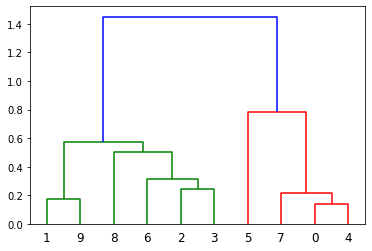

In [5]:
from scipy.cluster.hierarchy import dendrogram, ward, single
from sklearn import datasets
import matplotlib.pyplot as plt

# load dataset
X1 = datasets.load_iris().data[:10]
# Perform clustering
linkage_mat = ward(X1)
# Plot dendrogram
dendrogram(linkage_mat)
plt.show()

# Hierarchical Clustering Lab
In this notebook, we will be using sklearn to conduct hierarchical clustering on the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) which contains 4 dimensions/attributes and 150 samples. Each sample is labeled as one of the three type of Iris flowers.

In this exercise, we'll ignore the labeling and cluster based on the attributes, then we'll compare the results of different hierarchical clustering techniques with the original labels to see which one does a better job in this scenario. We'll then proceed to visualize the resulting cluster hierarchies.

## 1. Importing the Iris dataset


In [20]:
from sklearn import datasets
iris = datasets.load_iris()

a look at the first 10 samples in the dataset

In [21]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

`iris.target` contains the labels that indicate which tpye of Iris flower each sample is

In [22]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 2. Clustering
Let's now use sklearn's [```AgglomerativeClustering```](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) to conduct the heirarchical clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering
# Hierarchichal clustering
# Ward is the default linkage algorithm, so we'll start with that
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(iris.data)

Let's also try complete and average linkages

**Exercise**:
* Conduct hierarchical clustering with complete linkage, store the predicted labels in the variable ```complete_pred```
* Conduct hierarchical clustering with average linkage, store the predicted labels in the variable ```avg_pred```

Note: look at the documentation of [```AgglomerativeClustering```](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) to find the appropriate value to pass as the ```linkage``` value

In [26]:
# Hierarchical clustering using complete linkage
# TODO: Create an instance of AgglomerativeClustering with the appropriate parameters
compl = AgglomerativeClustering(n_clusters=3, linkage='complete')
# Fit & predict
# TODO: Make AgglomerativeClustering fit the dataset and predict the cluster labels
compl_pred = compl.fit_predict(iris.data)


# Hierarchical clustering using average linkage
# TODO: Create an instance of AgglomerativeClustering with the appropriate parameters
avg = AgglomerativeClustering(n_clusters=3, linkage='average')
avg_pred = avg.fit_predict(iris.data)

To determine which clustering result better matches the original labels of the samples, we can use ```adjusted_rand_score``` which is an *external cluster validation index* which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).

Cluster validation indices are discussed later in the course.

In [27]:
from sklearn.metrics import adjusted_rand_score
ward_ar_score = adjusted_rand_score(iris.target, ward_pred)

**Exercise**:
* Calculate the Adjusted Rand score of the clusters resulting from complete linkage and average linkage

In [29]:
# TODO: Calculated the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(iris.target, compl_pred)

# TODO: Calculated the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

Which algorithm results in the higher Adjusted Rand Score?

In [30]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.7311985567707745 
Complete:  0.64225125183629 
Average:  0.7591987071071522


## 3. The Effect of Normalizing on Clustering

Can we improve the clustering result?

Let's take another look at the dataset

In [31]:
iris.data[:15]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2]])

Looking at this, we can see that the fourth column has smaller values than the rest of the columns, and so its variance counts for less in the clustering process (since clustering is based on distance). Let us [normalize](https://en.wikipedia.org/wiki/Feature_scaling) the dataset so that each dimension lies between 0 and 1, so they  have equal weight in the clustering process.

This is done by subtracting the minimum from each column then dividing the difference by the range.

sklearn provides us with a useful utility called `preprocessing.normalize()` that cand that for us

In [32]:
from sklearn import preprocessing

normalized_X = preprocessing.normalize(iris.data)
normalized_X[:10]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

Now all the columns are in the range between 0 and 1, would clustering the dataset after this transformation lead to a better clustering? (one that better matches the original labels of the samples)

In [34]:
from sklearn import preprocessing

normalized_X = preprocessing.normalize(iris.data)
normalized_X[:10]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

In [35]:
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(normalized_X)

compl = AgglomerativeClustering(n_clusters=3, linkage='complete')
compl_pred = compl.fit_predict(normalized_X)

avg = AgglomerativeClustering(n_clusters=3, linkage='average')
avg_pred = avg.fit_predict(normalized_X)

ward_ar_score = adjusted_rand_score(iris.target, ward_pred)
compl_ar_score = adjusted_rand_score(iris.target, compl_pred)
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

print("Scores: \nWard:", ward_ar_score, "\nComplete: ", compl_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.8856970310281228 
Complete:  0.644447235392006 
Average:  0.5583714437541352


## 4. Dendrogram visualization with scipy

Let's visualize the highest scoring clustering result. 

To do that, we'll need to use Scipy's [```linkage```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function to perform the clusteirng again so we can obtain the linkage matrix it will later use to visualize the hierarchy

In [36]:
# Import scipy's linkage function to conduvt the clustering
from scipy.cluster.hierarchy import linkage

# Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Adjusted Rand Score
linkage_type = 'ward'
linkage_mat = linkage(normalized_X, linkage_type)

Plot using scipy's [dendrogram](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function

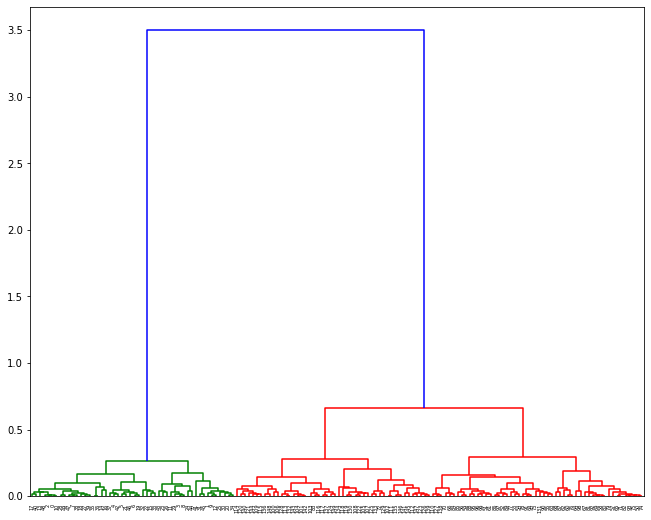

In [37]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(11, 9))

# plot using 'dendrogram()'
dendrogram(linkage_mat)
plt.show()

## 5. Visualization with Seaborn's ```clustermap``` 

The [seaborn](http://seaborn.pydata.org/index.html) plotting library for python can plot a [clustermap](http://seaborn.pydata.org/generated/seaborn.clustermap.html), which is a detailed dendrogram which also visualizes the dataset in more detail. It conducts the clustering as well, so we only need to pass it the dataset and the linkage type we want, and it will use scipy internally to conduct the clustering

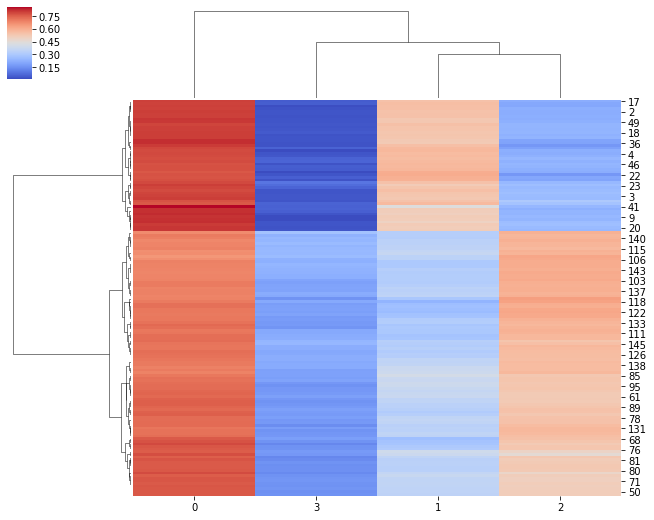

In [42]:
import seaborn as sns
sns.clustermap(normalized_X, figsize=(11,9), method=linkage_type, cmap='coolwarm')
plt.show()
## Expand figsize to a value like (18, 50) if you want the sample labels to be readable
## Draw back is that you'll need more scrolling to observe the dendrogram
# sns.clustermap(normalized_X, figsize=(18,50), method=linkage_type, cmap='coolwarm')
# plt.show()

Looking at the colors of the dimensions can you observe how they differ between the three type of flowers? You should at least be able to notice how one is vastly different from the two others (in the top third of the image).

# Overview
<img src='hc_consid.png' width=600px>

**Paper:** [Using Hierarchical Clustering of Secreted Protein Families to Classify and Rank Candidate Effectors of Rust Fungi](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0029847)

**Paper:** [Association between composition of the human gastrointestinal microbiome and development of fatty liver with choline deficiency](https://www.ncbi.nlm.nih.gov/pubmed/21129376)

# Density-Based Clustering | DBSCAN
<img src='dbscan_overview.png' width=600px>

**Looking at clusters, their core and border points**, we can see that cluster 1 is considered **compact** while cluster two is considered **elongated**

Here is how DBSCAN compares to K-Means. Note, DBSCAN requires no assumption of the number of centroids, only the minimum number of points to define a cluster (which may be very similar to K-Means when you consider the relationship between the number of observations and the number of clusters)

<img src='dbscan_vs_k.png' wifth=600px>